In [20]:
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

import warnings
warnings.filterwarnings('ignore')

In [2]:
heart=pd.read_csv("heart.csv")
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [3]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null float64
sex         303 non-null float64
cp          303 non-null float64
trestbps    303 non-null float64
chol        303 non-null float64
fbs         303 non-null float64
restecg     303 non-null float64
thalach     303 non-null float64
exang       303 non-null float64
oldpeak     303 non-null float64
slope       303 non-null float64
ca          303 non-null float64
thal        303 non-null float64
target      303 non-null int64
dtypes: float64(13), int64(1)
memory usage: 33.3 KB


In [4]:
heart.describe() 

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.686469,4.722772,0.937294
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.944160,1.938383,1.228536
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,4.000000


In [5]:
heart.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

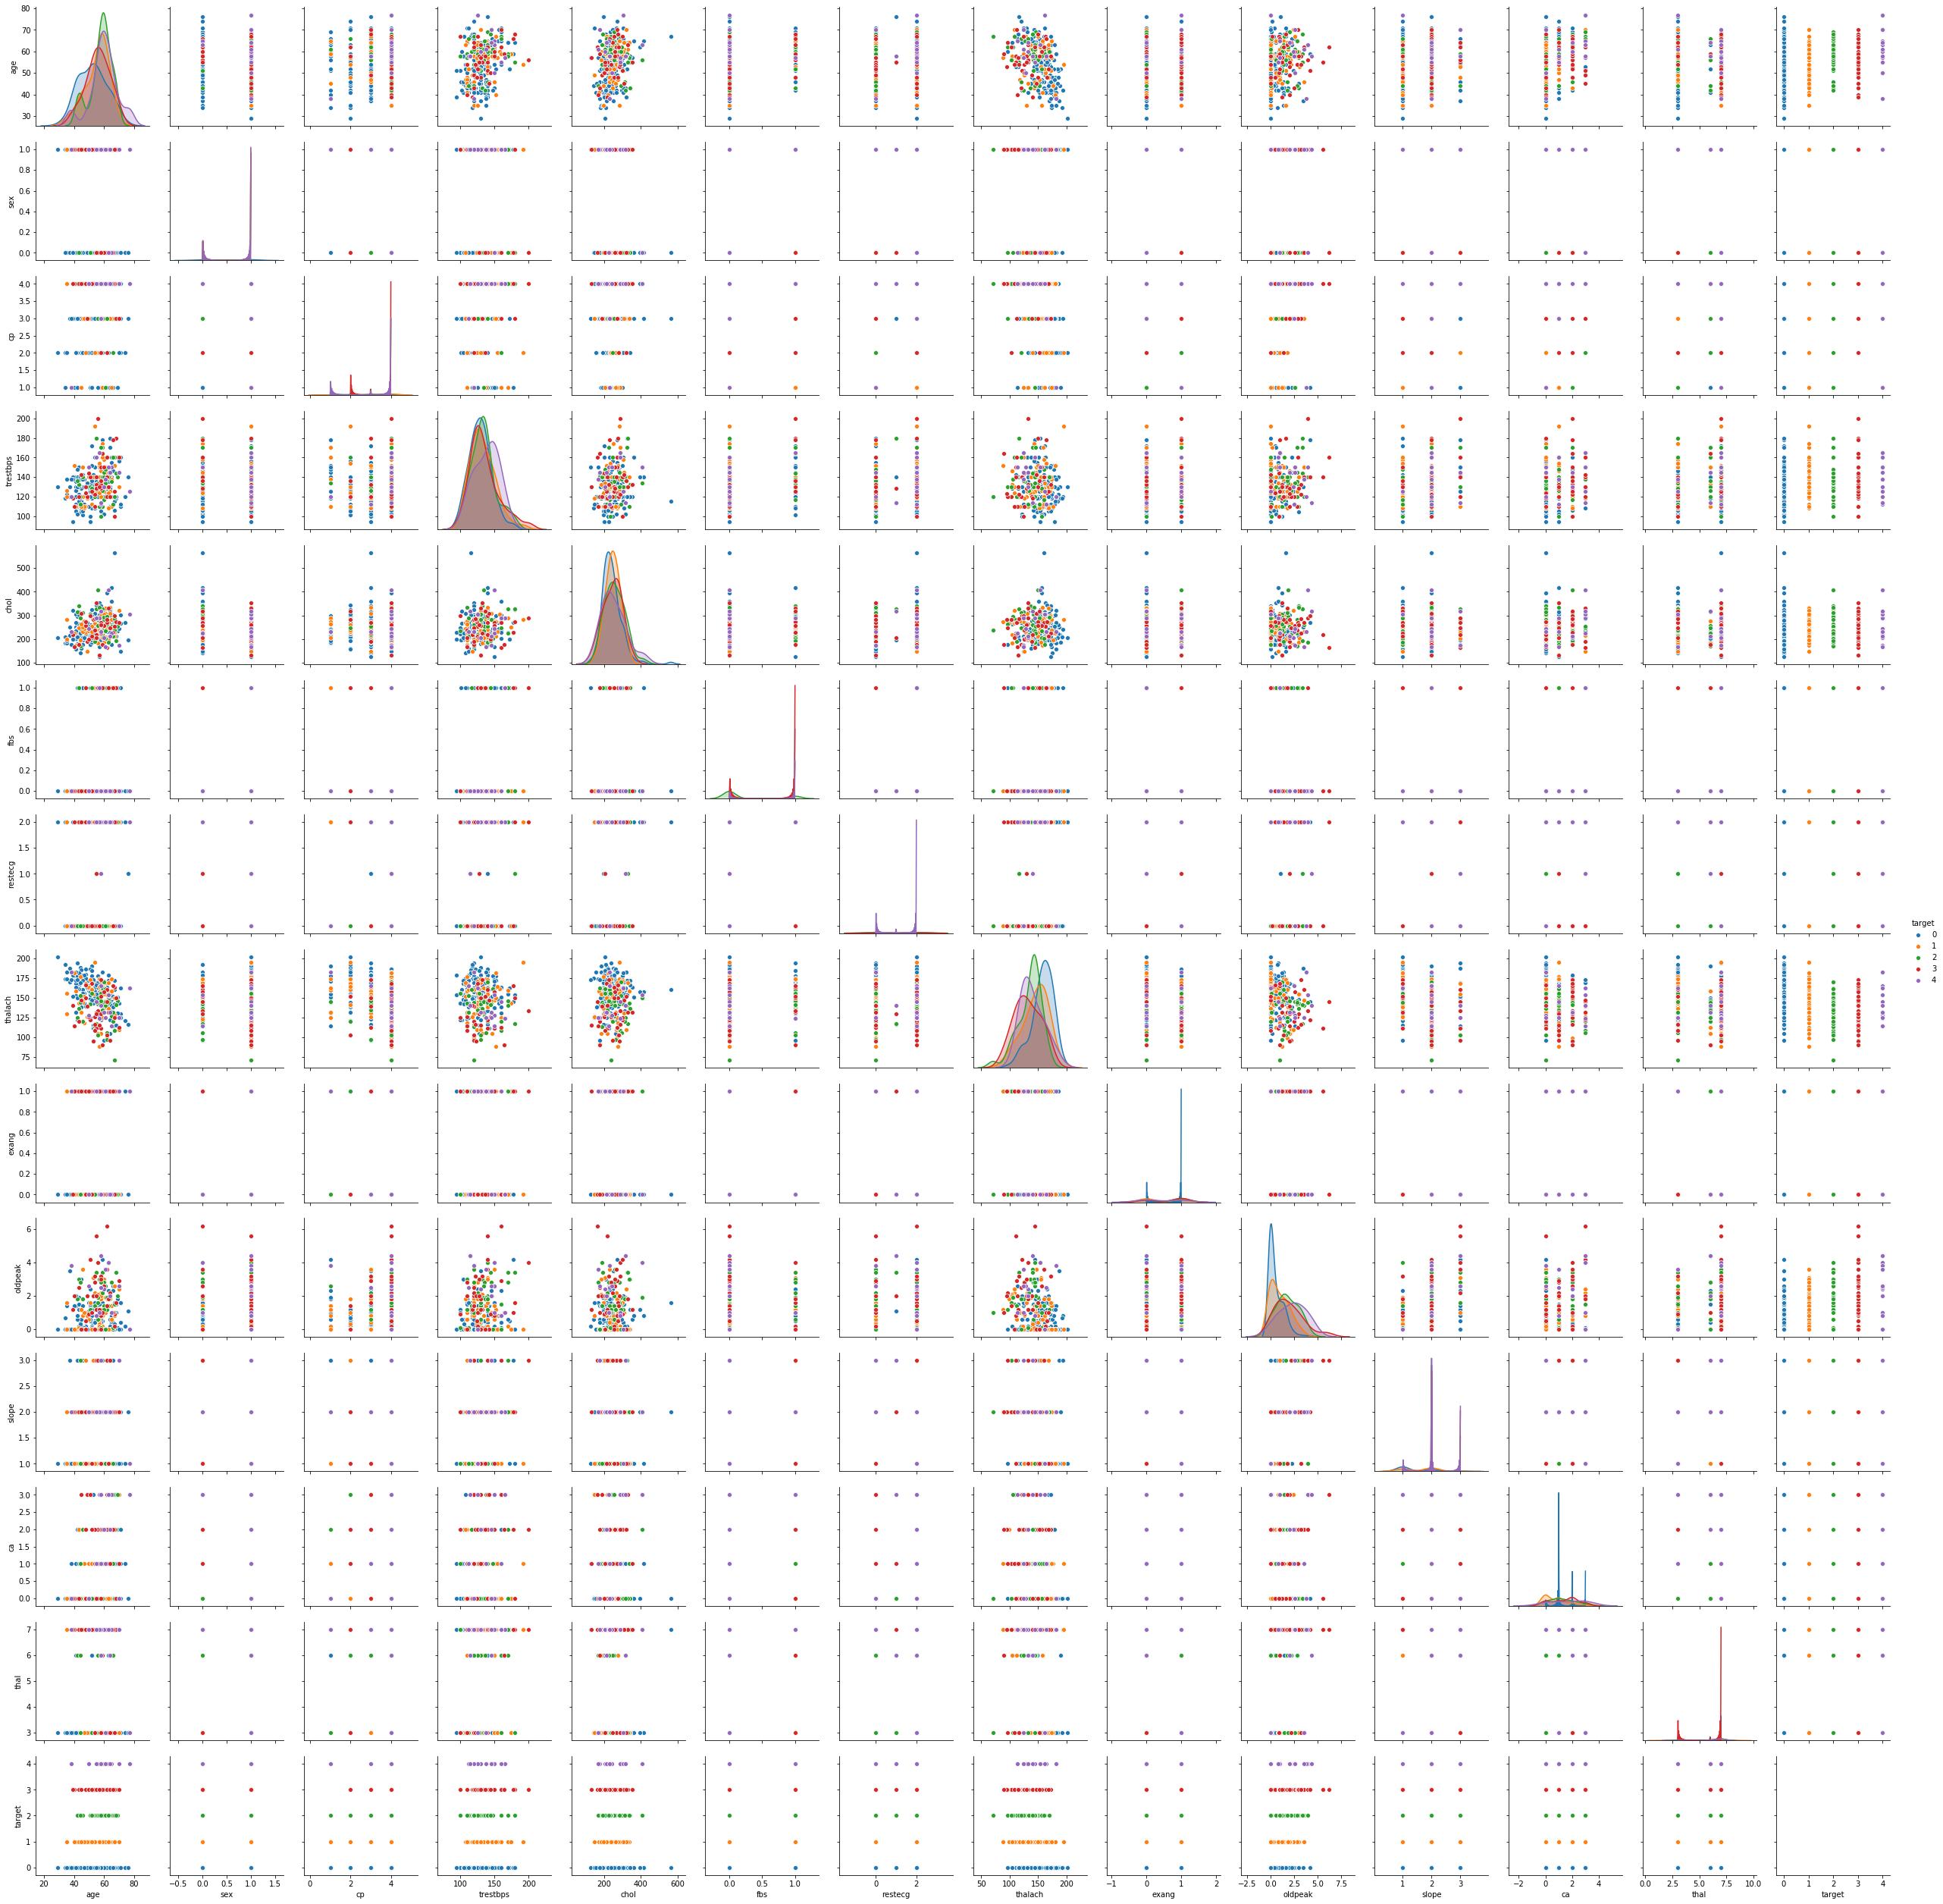

In [6]:
sns.pairplot(heart, hue = 'target') 

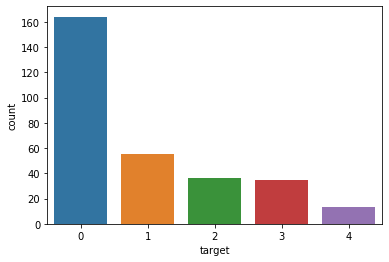

In [7]:
sns.countplot(heart['target']) 

In [8]:
heart.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.097542,0.104139,0.284946,0.208950,0.118530,0.148868,-0.393806,0.091661,0.203805,0.161770,0.344825,0.128303,0.222853
sex,-0.097542,1.000000,0.010084,-0.064456,-0.199915,0.047862,0.021647,-0.048663,0.146201,0.102173,0.037533,0.101974,0.380581,0.224469
cp,0.104139,0.010084,1.000000,-0.036077,0.072319,-0.039975,0.067505,-0.334422,0.384060,0.202277,0.152050,0.230304,0.262089,0.407075
trestbps,0.284946,-0.064456,-0.036077,1.000000,0.130120,0.175340,0.146560,-0.045351,0.064762,0.189171,0.117382,0.100338,0.134424,0.157754
chol,0.208950,-0.199915,0.072319,0.130120,1.000000,0.009841,0.171043,-0.003432,0.061310,0.046564,-0.004062,0.111006,0.018351,0.070909
fbs,0.118530,0.047862,-0.039975,0.175340,0.009841,1.000000,0.069564,-0.007854,0.025665,0.005747,0.059894,0.148761,0.064625,0.059186
restecg,0.148868,0.021647,0.067505,0.146560,0.171043,0.069564,1.000000,-0.083389,0.084867,0.114133,0.133946,0.120053,0.024325,0.183696
thalach,-0.393806,-0.048663,-0.334422,-0.045351,-0.003432,-0.007854,-0.083389,1.000000,-0.378103,-0.343085,-0.385601,-0.253325,-0.274142,-0.415040
exang,0.091661,0.146201,0.384060,0.064762,0.061310,0.025665,0.084867,-0.378103,1.000000,0.288223,0.257748,0.142134,0.325240,0.397057
oldpeak,0.203805,0.102173,0.202277,0.189171,0.046564,0.005747,0.114133,-0.343085,0.288223,1.000000,0.577537,0.277778,0.342405,0.504092


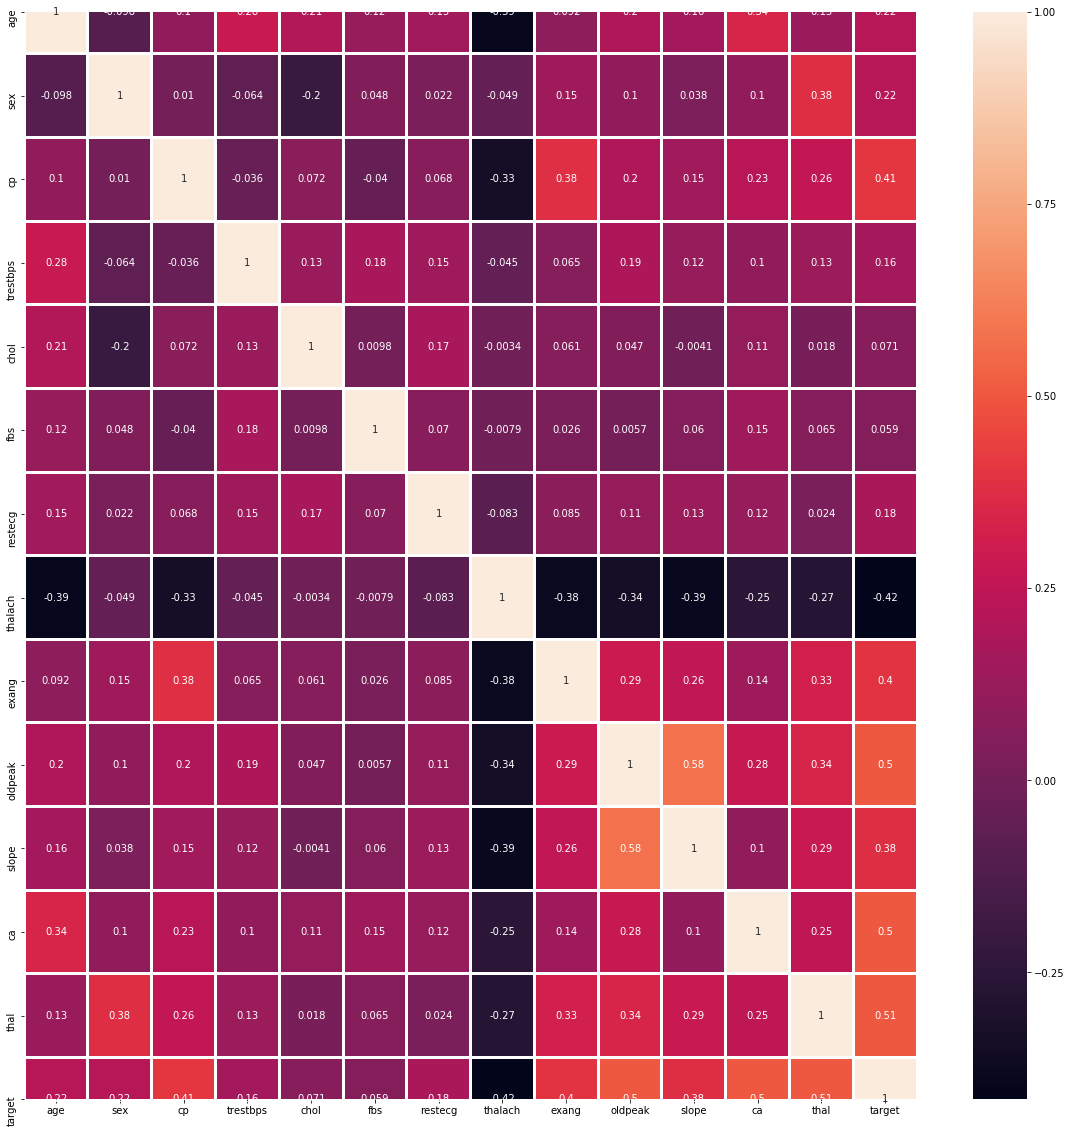

In [9]:
plt.figure(figsize=(20,20))
sns.heatmap(heart.corr(), annot = True, linewidths=2) 

In [10]:
x = heart.drop(['target'], axis = 1) 
x.head(6)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0
5,56.0,1.0,2.0,120.0,236.0,0.0,0.0,178.0,0.0,0.8,1.0,0.0,3.0


In [11]:
y = heart['target'] 
y.head(6)

0    0
1    2
2    1
3    0
4    0
5    0
Name: target, dtype: int64

In [12]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.33, random_state= 51)

In [13]:
x_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
245,67.0,1.0,4.0,120.0,237.0,0.0,0.0,71.0,0.0,1.0,2.0,0.0,3.0
192,43.0,1.0,4.0,132.0,247.0,1.0,2.0,143.0,1.0,0.1,2.0,2.0,7.0
99,48.0,1.0,4.0,122.0,222.0,0.0,2.0,186.0,0.0,0.0,1.0,0.0,3.0
288,56.0,1.0,2.0,130.0,221.0,0.0,2.0,163.0,0.0,0.0,1.0,0.0,7.0
7,57.0,0.0,4.0,120.0,354.0,0.0,0.0,163.0,1.0,0.6,1.0,0.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
222,39.0,0.0,3.0,94.0,199.0,0.0,0.0,179.0,0.0,0.0,1.0,0.0,3.0
16,48.0,1.0,2.0,110.0,229.0,0.0,0.0,168.0,0.0,1.0,3.0,0.0,7.0
197,45.0,0.0,4.0,138.0,236.0,0.0,2.0,152.0,1.0,0.2,2.0,0.0,3.0
224,63.0,0.0,4.0,108.0,269.0,0.0,0.0,169.0,1.0,1.8,2.0,2.0,3.0


In [14]:
x_test

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
260,44.0,0.0,3.0,118.0,242.0,0.0,0.0,149.0,0.0,0.3,2.0,1.0,3.0
211,38.0,1.0,1.0,120.0,231.0,0.0,0.0,182.0,1.0,3.8,2.0,0.0,7.0
104,49.0,1.0,3.0,120.0,188.0,0.0,0.0,139.0,0.0,2.0,2.0,3.0,7.0
108,61.0,1.0,4.0,120.0,260.0,0.0,0.0,140.0,1.0,3.6,2.0,1.0,7.0
135,55.0,0.0,2.0,135.0,250.0,0.0,2.0,161.0,0.0,1.4,2.0,0.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
63,54.0,0.0,3.0,135.0,304.0,1.0,0.0,170.0,0.0,0.0,1.0,0.0,3.0
115,41.0,1.0,2.0,135.0,203.0,0.0,0.0,132.0,0.0,0.0,2.0,0.0,6.0
85,44.0,1.0,3.0,140.0,235.0,0.0,2.0,180.0,0.0,0.0,1.0,0.0,3.0
283,35.0,1.0,2.0,122.0,192.0,0.0,0.0,174.0,0.0,0.0,1.0,0.0,3.0


In [15]:
y_train

245    2
192    1
99     0
288    0
7      0
      ..
222    0
16     1
197    0
224    1
57     1
Name: target, Length: 203, dtype: int64

In [16]:
y_test

260    0
211    4
104    3
108    2
135    0
      ..
63     0
115    0
85     0
283    0
71     3
Name: target, Length: 100, dtype: int64

In [18]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train_SC = sc.fit_transform(x_train)
x_test_SC= sc.transform(x_test)

In [21]:
model=[LogisticRegression(),GaussianNB(),KNeighborsClassifier(),SVC(),DecisionTreeClassifier(),RandomForestClassifier()]

for m in model:
    m.fit(x_train_SC,y_train)
    m.score(x_train_SC,y_train)#n_estimators = 20, criterion = 'entropy', random_state = 51
    pred=m.predict(x_test_SC)
    print("Accuracy score of", m ,"is : ",accuracy_score(y_test,pred))
    print("Confusion matrix of", m , "is :",confusion_matrix(y_test,pred))
    print("Classification report of", m , "is : ",classification_report(y_test,pred))
    print("\n")

Accuracy score of LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False) is :  0.66
Confusion matrix of LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False) is : [[57  3  2  0  0]
 [ 1  2  4  3  0]
 [ 0  5  3  5  0]
 [ 1  3  2  4  0]
 [ 2  1  0  2  0]]
Classification report of LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='wa

In [22]:
lr = LogisticRegression()      
lr.fit(x_train, y_train)
y_pred_lr = lr.predict(x_test)
print(accuracy_score(y_test, y_pred_lr))
print("Confusion matrix of", m , "is :",confusion_matrix(y_test,pred))
print("Classification report of", m , "is : ",classification_report(y_test,pred))

0.62
Confusion matrix of RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False) is : [[53  6  2  1  0]
 [ 4  2  2  2  0]
 [ 2  4  5  2  0]
 [ 2  3  2  3  0]
 [ 1  1  1  1  1]]
Classification report of RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10

In [23]:
cross_validation = cross_val_score(estimator = lr, X= x_train_SC,y = y_train, cv = 10)
print("Cross validation accuracy of  logistic regr model = ", cross_validation)
print("\nCross validation mean accuracy of logistic regr model = ", cross_validation.mean())

Cross validation accuracy of  logistic regr model =  [0.43478261 0.65217391 0.5        0.57142857 0.47619048 0.63157895
 0.63157895 0.57894737 0.61111111 0.61111111]

Cross validation mean accuracy of logistic regr model =  0.5698903054738296


I choose Logistic Regression as my final model because it perform well in this dataset..

In [28]:
from sklearn.externals import joblib

joblib.dump(lr,'heart.pkl')

['heart.pkl']